## Load librarys

In [41]:
import os
import sys
import torch
from PIL import Image
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

# Get the project root
project_root = os.path.abspath("..")    # Go up one level from "notebooks/"
sys.path.append(project_root)           # Add the root to the path

from src.tests.test_models import *
from src.tests.test_visualizations import *

## Testing model

In [42]:
path = os.path.join('../', 'data', 'final')

seed = 21
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

data_dir = path
batch_size = 32

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"[+] Device: {device}")

[+] Device: cpu


In [43]:
data_transforms = {
    'train': transforms.Compose([
        # transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        # transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        # transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

# Load the datasets with ImageFolder
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), transform=data_transforms[x])
    for x in ['train', 'val', 'test']
}


dataloaders = {
    x: DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True if x == 'train' else False, num_workers=4)
    for x in ['train', 'val', 'test']
}

In [44]:
image_path = os.path.join(os.getcwd(), '../', 'data', 'final', 'test', 'uriel_martinez', 'uriel_martinez_116.jpg')
model_path = os.path.join(os.getcwd(), '../', 'src','models', 'face_class_model.pth')
class_names = os.listdir(os.path.join(os.getcwd(), '../', 'data', 'final', 'test'))


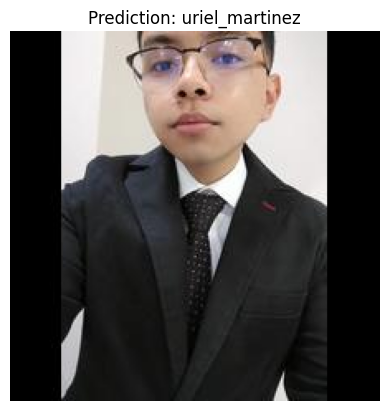

In [45]:
# Load the image and preprocess it
input_tensor = preprocess_image(image_path)

# Load the model
model = load_model(model_path, num_classes=len(class_names), device=device)

# Get the prediction
prediction = predict_image(model, input_tensor, class_names, device=device)

# Show the image with Image by PIL
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Prediction: {prediction}")
plt.axis("off")
plt.show() 

## Metrics

In [36]:
accuracy = calculate_accuracy(model, dataloaders['test'], device=device)

print(f"The accuracy of the model is: {accuracy*100:.2f}%")

The accuracy of the model is: 94.64%


array([[18,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  1,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0,  0, 

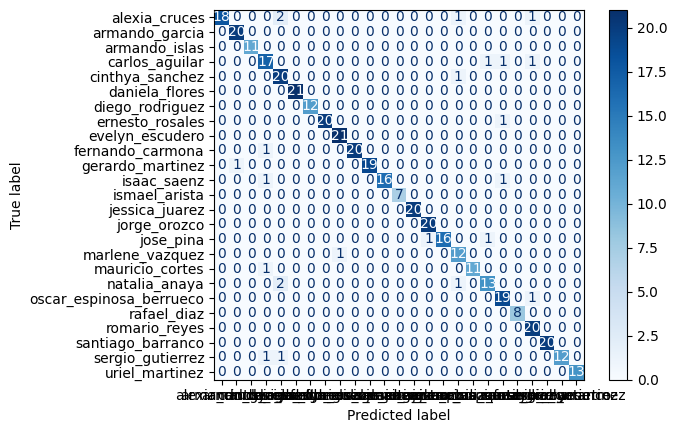

In [26]:
plot_confusion_matrix(model, dataloaders['test'], class_names, device=device)

In [28]:
evaluate_classification_report(model, dataloaders['test'], class_names, device=device)

                         precision    recall  f1-score   support

          alexia_cruces       1.00      0.82      0.90        22
         armando_garcia       0.95      1.00      0.98        20
          armando_islas       1.00      1.00      1.00        11
         carlos_aguilar       0.81      0.85      0.83        20
        cinthya_sanchez       0.80      0.95      0.87        21
         daniela_flores       1.00      1.00      1.00        21
        diego_rodriguez       1.00      1.00      1.00        12
        ernesto_rosales       1.00      0.95      0.98        21
        evelyn_escudero       0.95      1.00      0.98        21
       fernando_carmona       1.00      0.95      0.98        21
       gerardo_martinez       1.00      0.95      0.97        20
            isaac_saenz       1.00      0.89      0.94        18
          ismael_arista       1.00      1.00      1.00         7
         jessica_juarez       1.00      1.00      1.00        20
           jorge_orozco 